In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

In [5]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_data_DA_'
append_name ="_20221021-185407"
ncda = 9
#Model_data_DA_1_20221021-185407
data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    #print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV


In [12]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
df_lin = pd.read_excel(files_name,'Competitive LMPs', header=None)

In [24]:
df = data[0]
df[df.Iteration == 1]
Bus3_DA1_Mpec = df[df.Iteration == 1].Bus3_price.to_list()

df = data[6]
df[df.Iteration == 1]
Bus5_DA7_Mpec = df[df.Iteration == 1].Bus5_price.to_list()

Bus3_Optimal = df_lin.iloc[2].to_list()
Bus5_Optimal = df_lin.iloc[4].to_list()

df_bus3_price = pd.DataFrame({'Optimal':Bus3_Optimal, 'Mpec':Bus3_DA1_Mpec })
df_bus5_price = pd.DataFrame({'Optimal':Bus5_Optimal, 'Mpec':Bus5_DA7_Mpec })

In [23]:
df_bus3_price = df_bus3_price.melt(var_name="Model", value_name="Bus3 Price")
df_bus5_price = df_bus5_price.melt(var_name="Model", value_name="Bus5 Price")

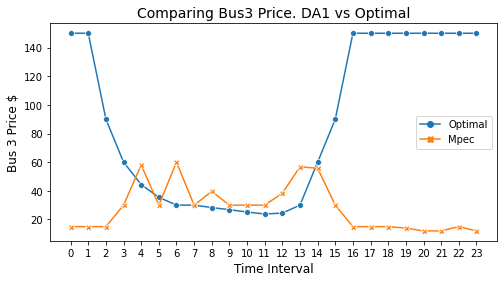

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.lineplot(data=df_bus3_price, markers=True, dashes=False)
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Bus3 Price. DA1 vs Optimal", fontsize=14)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('Bus 3 Price $',fontsize=12);

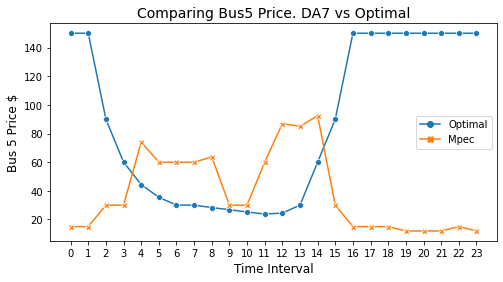

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.lineplot(data=df_bus5_price, markers=True, dashes=False)
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Bus5 Price. DA7 vs Optimal", fontsize=14)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('Bus 5 Price $',fontsize=12);